In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 98.9 MB/s 


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import mediapipe as mp


In [ ]:
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
def resize_and_show(image):
  DESIRED_HEIGHT = 380
  DESIRED_WIDTH = 380
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


In [ ]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    DESIRED_HEIGHT = 380
    DESIRED_WIDTH = 380

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    
    resultant = pose.process(image_in_RGB)

    image_hight, image_width, _ = image_pose.shape
    x_coodinate = resultant.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
    y_coodinate = resultant.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight  
    
    keypoints = pose.process(image_in_RGB)
    lm = keypoints.pose_landmarks
    lmPose  = mp_pose.PoseLandmark
    # WRIST
    wrist_x = int(lm.landmark[lmPose.RIGHT_WRIST].x * image_width)
    wrist_y = int(lm.landmark[lmPose.RIGHT_WRIST].y * image_hight)
    wrist_left_y = int(lm.landmark[lmPose.LEFT_WRIST].y * image_hight)
    
    if wrist_y < DESIRED_WIDTH or  wrist_left_y < DESIRED_HEIGHT:
      return 1
    else:
      return 0

In [ ]:
import os

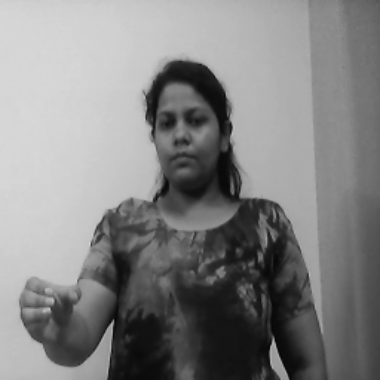

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CropImage/jo0289.png')
resize_and_show(image)

Left wrist coordinates: (211.90255737304688, 304.5451965332031)
Right wrist coordinates: (40.855255126953125, 212.29238891601562)


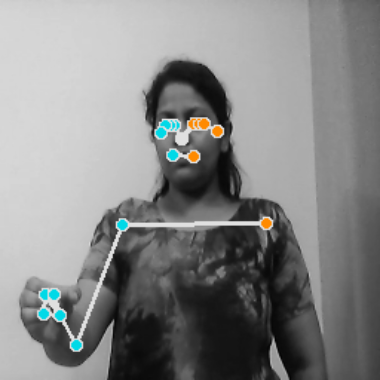

In [ ]:
with mp_pose.Pose(
    
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    image_hight, image_width, _ = image.shape
    
    print(
      f'Left wrist coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight})'
    )

    print(
      f'Right wrist coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight})'
    )

    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
resize_and_show(annotated_image)

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/read"
dir_list = os.listdir(dir)
dir_list.sort()
sign = 0
nosign = 0
for img_nm in dir_list[:1049]:
  img = cv2.imread(os.path.join(dir,img_nm))
  print(img_nm)
  result = detectPose(img, pose_image, draw=True, display=True)
  if result == 1:
    sign += 1
  else:
    nosign += 1

print("No of signed : ",sign)
print("No of not signed : ",nosign)

jo0001.png
jo0002.png
jo0003.png
jo0004.png
jo0005.png
jo0006.png
jo0007.png
jo0008.png
jo0009.png
jo0010.png
jo0011.png
jo0012.png
jo0013.png
jo0014.png
jo0015.png
jo0016.png
jo0017.png
jo0018.png
jo0019.png
jo0020.png
jo0021.png
jo0022.png
jo0023.png
jo0024.png
jo0025.png
jo0026.png
jo0027.png
jo0028.png
jo0029.png
jo0030.png
jo0031.png
jo0032.png
jo0033.png
jo0034.png
jo0035.png
jo0036.png
jo0037.png
jo0038.png
jo0039.png
jo0040.png
jo0041.png
jo0042.png
jo0043.png
jo0044.png
jo0045.png
jo0046.png
jo0047.png
jo0048.png
jo0049.png
jo0050.png
jo0051.png
jo0052.png
jo0053.png
jo0054.png
jo0055.png
jo0056.png
jo0057.png
jo0058.png
jo0059.png
jo0060.png
jo0061.png
jo0062.png
jo0063.png
jo0064.png
jo0065.png
jo0066.png
jo0067.png
jo0068.png
jo0069.png
jo0070.png
jo0071.png
jo0072.png
jo0073.png
jo0074.png
jo0075.png
jo0076.png
jo0077.png
jo0078.png
jo0079.png
jo0080.png
jo0081.png
jo0082.png
jo0083.png
jo0084.png
jo0085.png
jo0086.png
jo0087.png
jo0088.png
jo0089.png
jo0090.png
jo0091.png